For our final project, we will be using supervised machine learning to predict airbnb rental prices in the city of Nashville, based on several parameters. Our data source is the past year's data, pulled from 4 separate quarterly files from Kaggle. Because our data output will be a continuous variable (a number), we will use a regression model.

Our target variable:

+ price

Our features variables:

+ 

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv(Path("091522_listings.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.14,1,257,0,NaN
1,39870,Close to Vanderbilt 2,171184,Evelyn,NaN,District 18,36.12523,-86.81278,Private room,72,1,328,2022-09-11,4.49,2,134,64,NaN
2,59576,Large Master Suite near Lake *ladies only NS plz,812128,Patricia And John,NaN,District 12,36.18749,-86.59004,Private room,39,31,1,2022-06-26,0.37,10,180,1,NaN
3,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,NaN,District 18,36.13122,-86.80066,Entire home/apt,105,2,658,2022-09-11,4.79,1,59,56,NaN
4,258817,"ButterflyRoom-queen room, private bath",22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,39,30,96,2019-12-14,0.73,8,288,0,NaN


In [2]:
# Check the values for the Neighbourhood column
df["neighbourhood"].value_counts()

District 19    1711
District 17     931
District 5      829
District 21     768
District 6      584
District 15     409
District 2      288
District 7      283
District 18     251
District 20     194
District 8      183
District 16     137
District 24     134
District 13      96
District 33      79
District 11      71
District 1       66
District 3       62
District 10      61
District 14      61
District 25      57
District 26      56
District 12      54
District 35      46
District 29      44
District 4       43
District 27      39
District 9       31
District 30      29
District 22      27
District 31      26
District 32      22
District 28      21
District 23      20
District 34      20
Name: neighbourhood, dtype: int64

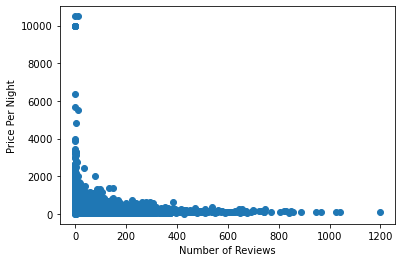

In [3]:
# Visualize Number of Reviews vs Price
plt.scatter(df.number_of_reviews, df.price)
plt.xlabel('Number of Reviews')
plt.ylabel('Price Per Night')
plt.show()

In [4]:
# Format data
X = df.number_of_reviews.values.reshape(-1, 1)

In [5]:
# Examine first five entries
X[:5]

array([[674],
       [328],
       [  1],
       [658],
       [ 96]], dtype=int64)

In [6]:
# Examine the shape
X.shape

(7733, 1)

In [7]:
# Assign the target variable
y = df.price

In [8]:
# Create an instance of the linear regression model
model = LinearRegression()

In [9]:
# Train the model
model.fit(X, y)

LinearRegression()

In [10]:
# Generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(7733,)


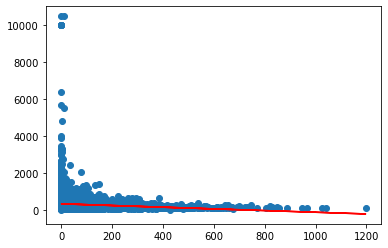

In [11]:
# Plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
# Examine the parameters
print(model.coef_)
print(model.intercept_)

[-0.45776809]
317.719070984132
